# Task-02
# DataSceince
# Prodigy InfoTech.

## brief about data : 
### The Titanic dataset is one of the most well-known datasets in data science and machine learning.  It provides information about the passengers on the Titanic, which sank after hitting an iceberg during its maiden voyage in 1912.

#### Features (Columns)
#### PassengerId: A unique identifier for each passenger.
#### Survived: Survival (0 = No, 1 = Yes). This is the target variable.
#### Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd). This reflects socioeconomic status.
#### Name: Name of the passenger.
#### Sex: Gender of the passenger.
#### Age: Age of the passenger in years.
#### SibSp: Number of siblings or spouses aboard the Titanic.
#### Parch: Number of parents or children aboard the Titanic.
#### Ticket: Ticket number.
#### Fare: Passenger fare.
#### Cabin: Cabin number.
#### Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).


# important library needed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Wrangle Function

In [2]:
#read & clean data
def wrangle(filepath):
    # Read CSV file
    df = pd.read_csv(filepath)
    
    # Create a DataFrame with the proportion of null values for each column
    null_proportion = df.isnull().mean()
    
    # Filter the columns where the proportion of null values is greater than 0.40
    columns_to_drop = null_proportion[null_proportion > 0.40].index
    
    # Drop the columns
    df = df.drop(columns=columns_to_drop)
    
    # Fill remaining missing values with mean or mode
    columns_has_nulls = df.isnull().sum()
    columns_to_fill = columns_has_nulls[columns_has_nulls > 0].index
    
    for column in columns_to_fill:
        if df[column].dtype == 'object':  # Check if the column is categorical
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:
            df[column].fillna(df[column].mean(), inplace=True)
    
    return df

In [5]:
#reading data
t_data = wrangle(r"C:\Users\Mega Store\Downloads\train.csv")
print(t_data.head())
print(t_data.info())
print(t_data.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  
<class 'pandas.core.frame.DataFrame'>


# EDA

In [6]:
# calssify age column into kids , young , old
def classify_age(age):
    if age <= 12:
        return 'kids'
    elif age <= 39:
        return 'young'
    else:
        return 'old'

def add_age_group(df):
    # Apply the classify_age function to create a new 'age_group' column
    df['age_group'] = df['Age'].apply(classify_age)
    return df

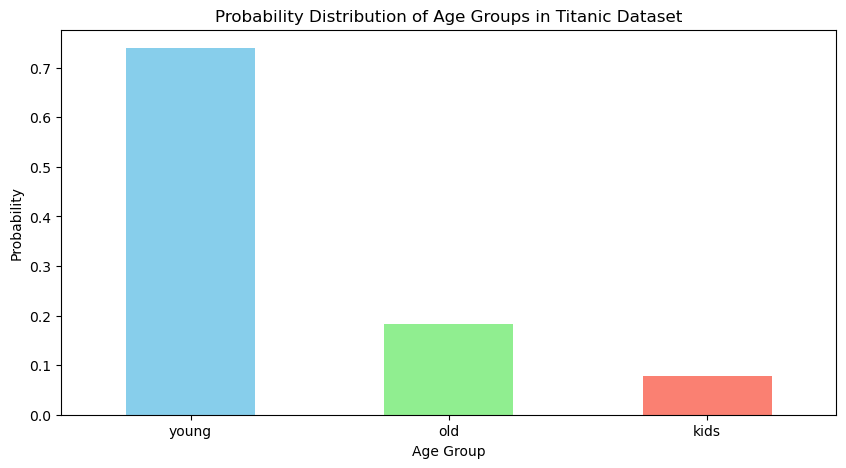

In [8]:
# Add the age group classification
t_data = add_age_group(t_data)

# Calculate the probability (proportion) of passengers in each age group
age_group_counts = t_data['age_group'].value_counts(normalize=True)

# Plot the probability distribution
plt.figure(figsize=(10, 5))
age_group_counts.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon', 'gray'])
plt.title('Probability Distribution of Age Groups in Titanic Dataset')
plt.xlabel('Age Group')
plt.ylabel('Probability')
plt.xticks(rotation=0)
plt.show()

# plot heat map to visiaulize corrolation between features

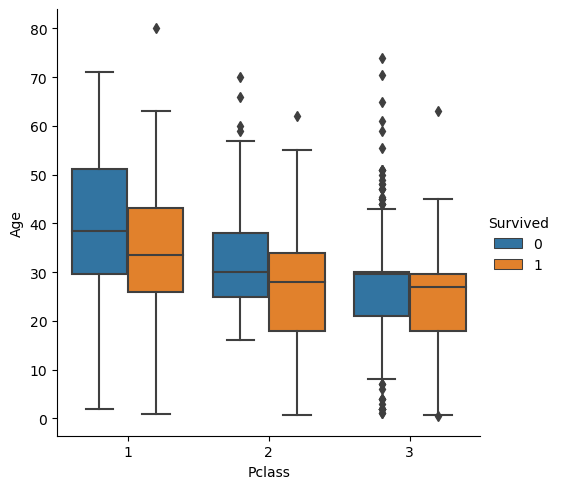

In [69]:
# plot boxplot between age and pclass related to target
sns.catplot(y = 'Age', x='Pclass', hue='Survived',kind='box', data=t_data)

# Plot the distribution of each numerical feature

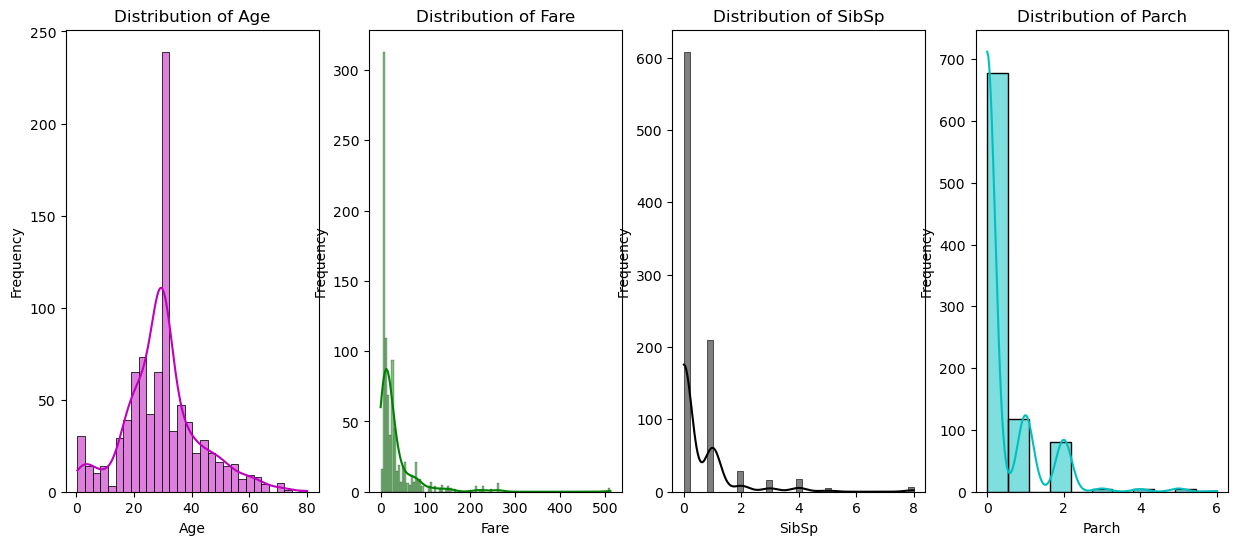

In [31]:
color = ['m' , 'g' , 'k' , 'c']
numerical_features = ['Age', 'Fare','SibSp','Parch']
fig, axs = plt.subplots(1, 4, figsize=(15, 6))
for i,feature in enumerate(numerical_features):
    sns.histplot(data=t_data, x=feature, kde=True , ax = axs[i] , color = color[i] )
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Frequency')
    
plt.show()

# Plot the distribution of each categorical feature

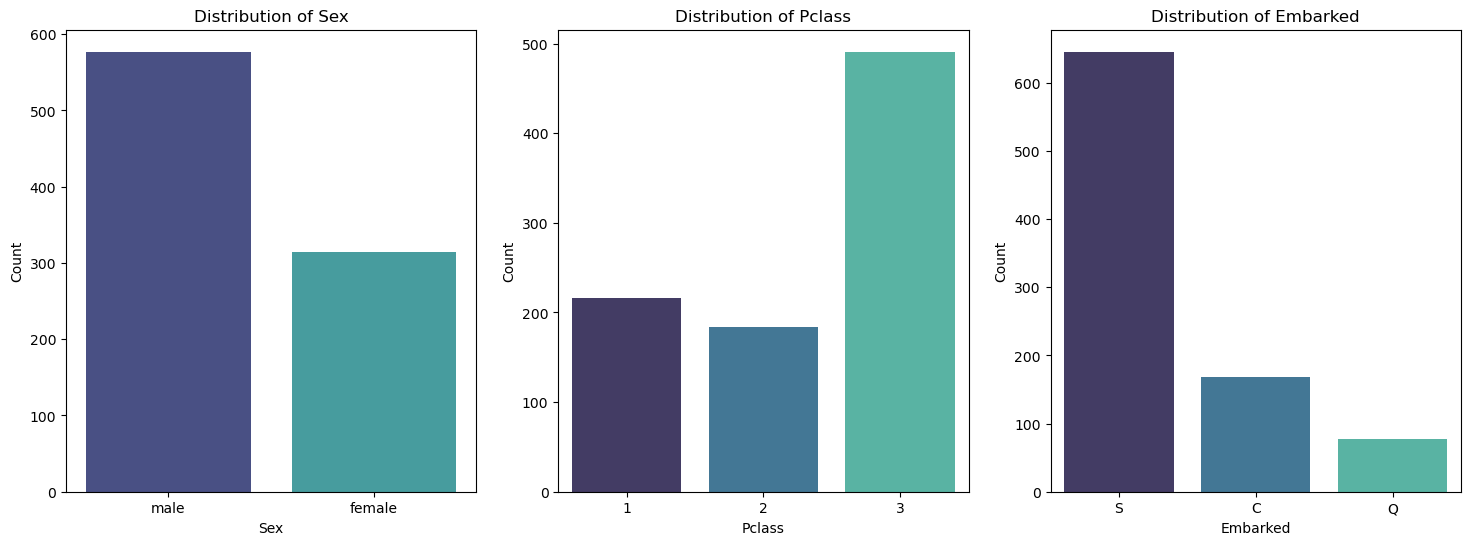

In [20]:
categorical_features = ['Sex', 'Pclass', 'Embarked'] 
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
for i , feature in enumerate(categorical_features):
    sns.countplot(data=t_data, x=feature , ax = axs[i], palette = 'mako')
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Count')

plt.show()

# Plot pie chart of each numerical feature

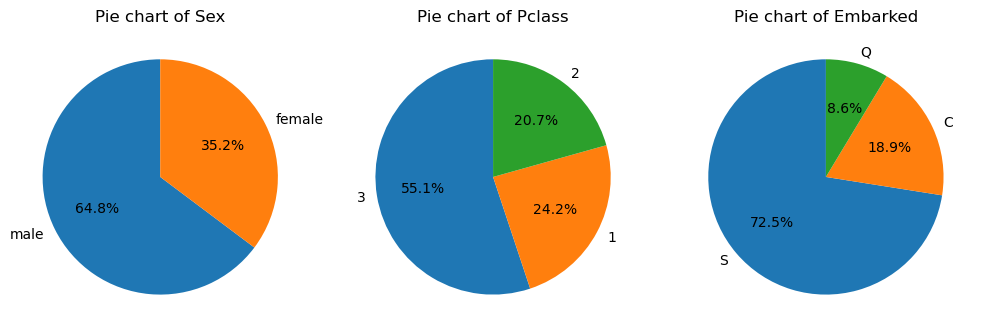

In [21]:
# Create subplots
fig, axes = plt.subplots(1,3, figsize=(10, 5))

# Plot pie charts for each categorical column
for i, column in enumerate(categorical_features):
    t_data[column].value_counts().plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=90
    )
    axes[i].set_title(f'Pie chart of {column}')
    axes[i].set_ylabel('')

# Adjust layout to avoid overlap
plt.tight_layout()

# show the difference of age between males & female 

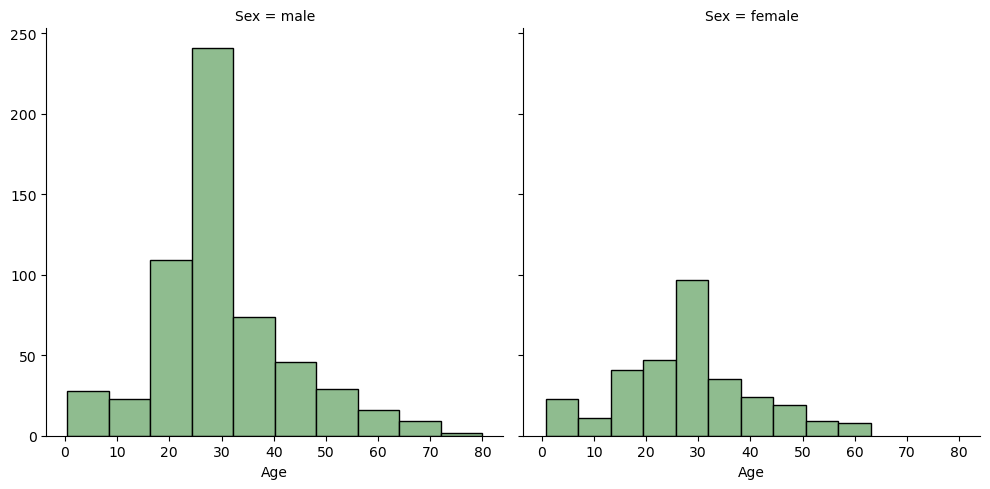

In [47]:
sns.FacetGrid(t_data, col='Sex', height=5, aspect=1).map(plt.hist,
                                                         'Age', bins=10, 
                                                         color='darkseagreen', edgecolor='black'
                                                        )

g.set_axis_labels('Age', 'Frequency')
plt.show()